# Spam Detection

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/luisangelmendozavelasco.github.io/blob/master/_portfolio/Applied_Data_Science_with_Python_Specialization/portfolio-5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

**Objective**: Train multiple classification models to predict if a message is spam or not.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression

## Load the dataset

In [2]:
file_url = 'https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Text_Mining_in_Python/Week3/Labs/data/spam.csv'
df = pd.read_csv(file_url)
df['target'] = np.where(df['target'] == 'spam', 1, 0)
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## Understand the dataset

The [SMS Spam Collection](https://archive.ics.uci.edu/dataset/228/sms+spam+collection) dataset is a widely used benchmark for text classification, specifically designed for identifying spam SMS messages. It contains a collection of 5,574 SMS messages in English, labeled as either “spam” or “non-spam” (legitimate). The dataset is sourced from the University of California, Irvine (UCI) Machine Learning Repository.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5572 non-null   object
 1   target  5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


## Visualize the class distribution

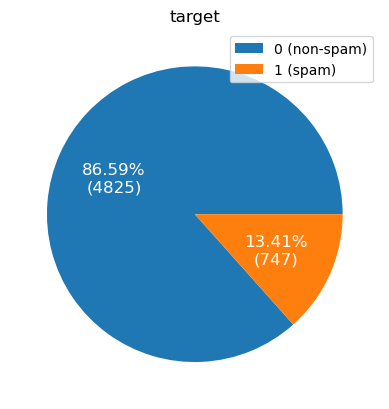

In [4]:
labels, sizes = np.unique(df["target"], return_counts=True)

fig, ax = plt.subplots()
ax.pie(sizes, textprops={'fontsize': '12', 'color': 'w'}, autopct=lambda pct: "{:.2f}%\n({:d})".format(pct, round(pct/100 * sum(sizes))))
ax.legend(["1 (spam)" if i else "0 (non-spam)" for i in labels])
ax.set_title("target")
plt.show()

## Split the dataset into train and test subsets

In [5]:
X = df['text']
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4179,)
X_test shape: (1393,)


## Convert the text data into a matrix of token counts

In [6]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

Tokens with the largest lengths:

In [7]:
tokens = [(token, len(token)) for token in vectorizer.vocabulary_.keys()]
pd.DataFrame(sorted(tokens, key=lambda item: item[1], reverse=True)[:15], columns=["token", "lenght"])

,token,lenght
0,com1win150ppmx3age16subscription,32
1,minmoremobsemspobox45po139wa,28
2,50pmmorefrommobile2bremoved,27
3,minmobsmorelkpobox177hp51fl,27
4,callcost150ppmmobilesvary,25
5,150ppmpobox10183bhamb64xe,25
6,150ppermesssubscription,23
7,datebox1282essexcm61xn,22
8,tscs087147403231winawk,22
9,boughtåóbraindanceåóa,21


## Train a Multinomial Naive Bayes classifier using count vectorization

In [8]:
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

## Evalute the model

              precision    recall  f1-score   support

           0     0.9909    1.0000    0.9954      1196
           1     1.0000    0.9442    0.9713       197

    accuracy                         0.9921      1393
   macro avg     0.9954    0.9721    0.9834      1393
weighted avg     0.9922    0.9921    0.9920      1393



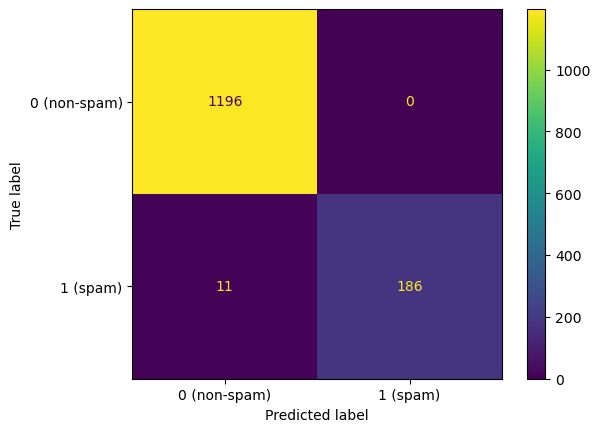

In [9]:
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-spam)", "1 (spam)"])
plt.show()

## Convert the text data into a matrix of TF-IDF features

In [10]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [11]:
feature_names_idfs = list(zip(vectorizer.get_feature_names_out(), vectorizer.idf_))

Smallest IDF values:

In [12]:
smallest_idfs = sorted(feature_names_idfs, key=lambda item: item[1])[:10]
pd.DataFrame(smallest_idfs, columns=["Token", "IDF"]).set_index("Token")

,IDF
Token,
to,2.198406
you,2.265645
the,2.707383
in,2.890761
and,2.976764
is,3.003012
me,3.111530
for,3.206840
it,3.222174


Largest IDF values:

In [13]:
largest_idfs = sorted(feature_names_idfs, key=lambda item: item[1], reverse=True)[:10]
pd.DataFrame(largest_idfs, columns=["Token", "IDF"]).set_index("Token")

,IDF
Token,
000pes,8.644919
0089,8.644919
0121,8.644919
01223585236,8.644919
0125698789,8.644919
02072069400,8.644919
02073162414,8.644919
02085076972,8.644919
021,8.644919


## Train a Multinomial Naive Bayes classifier using TF-IDF vectorization

In [14]:
vectorizer = TfidfVectorizer(min_df=3)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train_vectorized, y_train)

MultinomialNB(alpha=0.1)

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9811    1.0000    0.9905      1196
           1     1.0000    0.8832    0.9380       197

    accuracy                         0.9835      1393
   macro avg     0.9906    0.9416    0.9642      1393
weighted avg     0.9838    0.9835    0.9831      1393



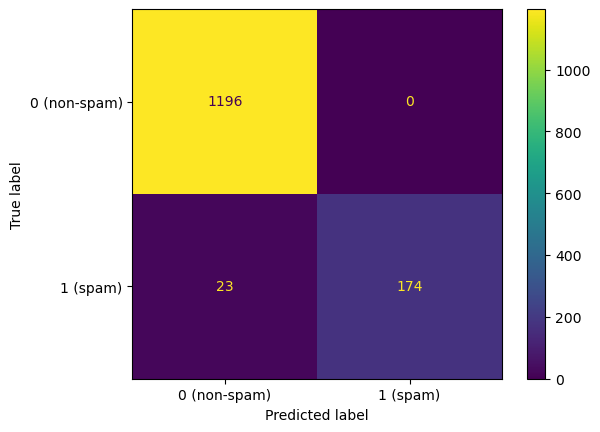

In [15]:
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-spam)", "1 (spam)"])
plt.show()

## Get the average length of spam and non-spam messages

In [16]:
df['length'] = df['text'].apply(lambda txt: len(txt))
nonspam_mean_length = np.mean(df[df['target'] == 0]['length'])
spam_mean_length = np.mean(df[df['target'] == 1]['length'])

print("Average length of spam messages: {:.2f}".format(spam_mean_length))
print("Average length of non-spam messages: {:.2f}".format(nonspam_mean_length))

Average length of spam messages: 138.87
Average length of non-spam messages: 71.02


## Train a Support Vector Classifier using TF-IDF vectorization and average length

In [17]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [18]:
vectorizer = TfidfVectorizer(min_df=5)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, X_train.str.len())
X_test_vectorized = vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, X_test.str.len())

classifier = SVC(C=10000)
classifier.fit(X_train_vectorized, y_train)

SVC(C=10000)

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9892    0.9983    0.9938      1196
           1     0.9892    0.9340    0.9608       197

    accuracy                         0.9892      1393
   macro avg     0.9892    0.9662    0.9773      1393
weighted avg     0.9892    0.9892    0.9891      1393



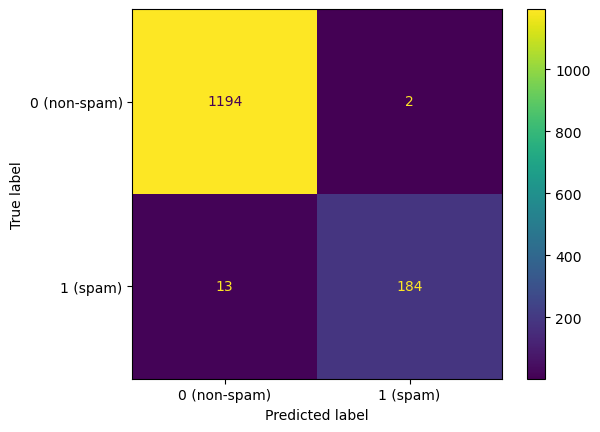

In [19]:
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-spam)", "1 (spam)"])
plt.show()

## Get the average number of digits of spam and non-spam messages

In [20]:
df['digits'] = df['text'].apply(lambda txt: len([char for char in txt if char.isdigit()]))
nonspam_mean_digits = np.mean(df[df['target'] == 0]['digits'])
spam_mean_digits = np.mean(df[df['target'] == 1]['digits'])

print("Average number of digits in spam messages: {:.2f}".format(spam_mean_digits))
print("Average number of digits in not spam messages: {:.2f}".format(nonspam_mean_digits))

Average number of digits in spam messages: 15.76
Average number of digits in not spam messages: 0.30


## Train a Logistic Regression classifier using TF-IDF vectorization, average length and average number of digits

In [21]:
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 3))
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, [X_train.str.len(), X_train.str.findall(r'\d').str.len()])
X_test_vectorized = vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, [X_test.str.len(), X_test.str.findall(r'\d').str.len()])

classifier = LogisticRegression(C=100, max_iter=1000)
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(C=100, max_iter=1000)

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9917    0.9975    0.9946      1196
           1     0.9842    0.9492    0.9664       197

    accuracy                         0.9907      1393
   macro avg     0.9879    0.9734    0.9805      1393
weighted avg     0.9906    0.9907    0.9906      1393



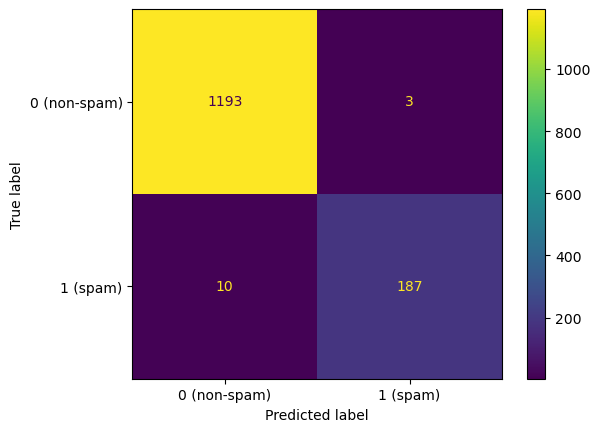

In [22]:
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-spam)", "1 (spam)"])
plt.show()

## Get the average number of non-word characters of non-spam and spam messages

In [23]:
df['non_word'] = df['text'].str.findall(r'\W').str.len()
nonspam_mean_non_word = np.mean(df[df['target'] == 0]['non_word'])
spam_mean_non_word = np.mean(df[df['target'] == 1]['non_word'])

print("Average number of non-word characters in spam messages: {:.2f}".format(spam_mean_non_word))
print("Average number of non-word characters in non-spam messages: {:.2f}".format(nonspam_mean_non_word))

Average number of non-word characters in spam messages: 29.04
Average number of non-word characters in non-spam messages: 17.29


## Train a Logistic Regression classifier using count vectorization, average length, average number of digits and average number of non-word characters

In [24]:
vectorizer = CountVectorizer(min_df=5, ngram_range=(2, 5), analyzer='char_wb')
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_train_vectorized = add_feature(X_train_vectorized, [X_train.str.len(), X_train.str.findall(r'\d').str.len(), X_train.str.findall(r'\W').str.len()])
X_test_vectorized = vectorizer.transform(X_test)
X_test_vectorized = add_feature(X_test_vectorized, [X_test.str.len(), X_test.str.findall(r'\d').str.len(), X_test.str.findall(r'\W').str.len()])

classifier = LogisticRegression(C=100, max_iter=1000)
classifier.fit(X_train_vectorized, y_train)

LogisticRegression(C=100, max_iter=1000)

## Evaluate the model

              precision    recall  f1-score   support

           0     0.9942    0.9967    0.9954      1196
           1     0.9794    0.9645    0.9719       197

    accuracy                         0.9921      1393
   macro avg     0.9868    0.9806    0.9836      1393
weighted avg     0.9921    0.9921    0.9921      1393



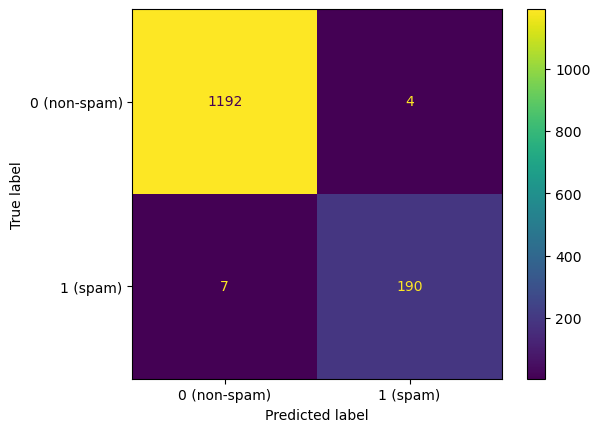

In [25]:
y_pred = classifier.predict(X_test_vectorized)
print(classification_report(y_test, y_pred, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["0 (non-spam)", "1 (spam)"])
plt.show()